# Lab Program 8

Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Petal')

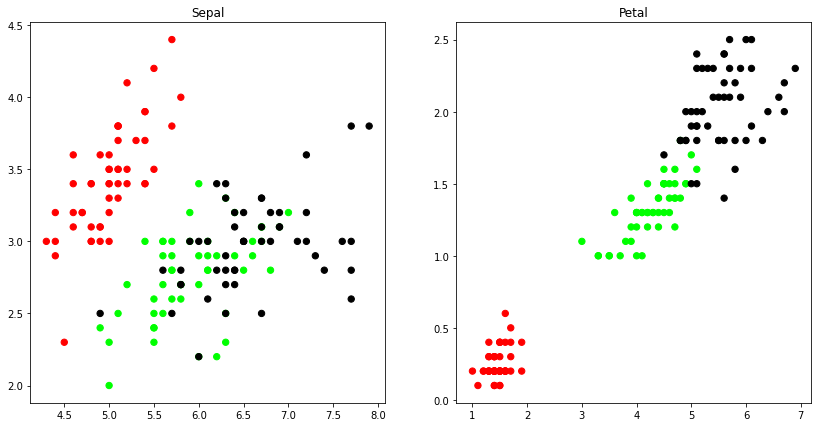

In [2]:
iris = datasets.load_iris()
# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

In [3]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(X)
# This is what KMeans thought
print("The predicted labels using K-Means\n",model.labels_)

The predicted labels using K-Means
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


The predicted labels
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 1.0, 'K Mean Classification')

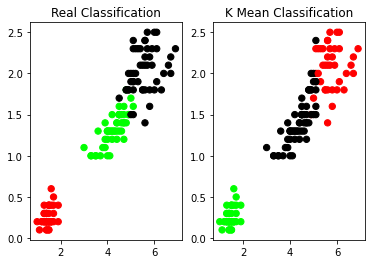

In [4]:

# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print("The predicted labels\n",predY)

# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [5]:
print("Accuracy for K-Means:",sm.accuracy_score(y, model.labels_))

Accuracy for K-Means: 0.09333333333333334


Text(0.5, 1.0, 'GMM Classification')

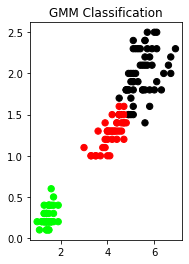

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

y_cluster_gmm = gmm.predict(X)
y_cluster_gmm

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')


In [7]:
print("Accuracy for GMM:",sm.accuracy_score(y, y_cluster_gmm))

Accuracy for GMM: 0.3333333333333333
